In [1]:
import numpy as np
from numpy.linalg import norm, solve
from scipy.stats import multivariate_normal as MVN
from scipy.optimize import fsolve
from numpy import sqrt, zeros, eye, exp, log, array, vstack
from Manifolds.GeneralizedEllipse import GeneralizedEllipse
import matplotlib.pyplot as plt
from matplotlib import rc
from utils import prep_contour

from RWM import RWM
from HMC.static_hmc import HMC
from tangential_hug_functions import HugTangential

In [2]:
# PRIOR
def logprior(xi):
    return log(0.5 * MVN(np.array([-1, 0]), 0.5*eye(2)).pdf(xi) + 0.5 * MVN(np.array([1, 0]), 0.5*eye(2)).pdf(xi))


# EPANECHNIKOV KERNEL
def log_epa_kernel_broadcast(xi_matrix, epsilon, target, z0):
    u_vector = sqrt((f(xi_matrix) - z0)**2)
    with np.errstate(divide='ignore'):
        return log((3*(1 - (u_vector**2 / (epsilon**2))) / (4*epsilon)) * (u_vector <= epsilon).astype('float'))

# UNIFORM KERNEL
def log_uni_kernel_broadcast(xi_matrix, epsilon, target, z0):
    with np.errstate(divide='ignore'):
        return log((abs(f(xi_matrix) - z0) <= epsilon).astype('float64'))
    
# GAUSSIAN KERNEL
def log_gau_kernel_broadcast(xi_matrix, epsilon, target, z0):
    return -log(sqrt(2*np.pi)*epsilon) -0.5*((f(xi_matrix) - z0) / epsilon)**2

In [3]:
mu_target = zeros(2)
Sigma_target = np.array([[1.0, 0.3], [0.3, 1.0]])
target = MVN(mu_target, Sigma_target)
epsilon = 0.5 #0.5
z0 = -2.9513586307684885
f = target.logpdf

In [4]:
ellipse = GeneralizedEllipse(mu_target, Sigma_target, exp(z0))

In [5]:
def log_post_epa(xi):
    return logprior(xi) + log_epa_kernel_broadcast(xi, epsilon, target, z0)

def log_post_uni(xi):
    return logprior(xi) + log_uni_kernel_broadcast(xi, epsilon, target, z0)

def log_post_gau(xi):
    return logprior(xi) + log_gau_kernel_broadcast(xi, epsilon, target, z0)

In [6]:
logpost_contours_epa  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa)
logpost_contours_uni  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_uni)
logpost_contours_gau  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_gau)
logprior_contours = prep_contour([-2, 2], [-2, 2], 0.01, logprior)
manifold = prep_contour([-2, 2], [-2, 2], 0.01, f)

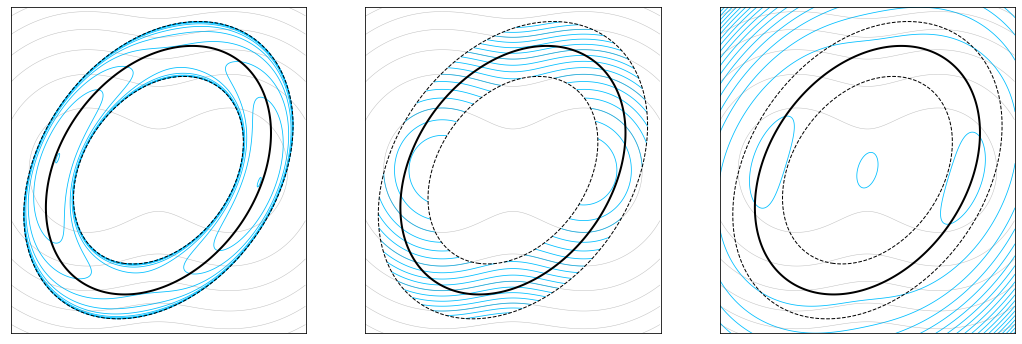

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
### epanechnikov kernel
ax[0].contour(*logpost_contours_epa, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[0].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[0].contour(*manifold, levels=[z0], linewidths=2.0, colors=['black'], linestyles='solid')
ax[0].contour(*manifold, levels=[z0-epsilon, z0+epsilon], linestyles='--', colors='black', linewidths=1.0)
ax[0].set_xticks([])
ax[0].set_yticks([])

### uniform kernel
ax[1].contour(*logpost_contours_uni, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[1].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[1].contour(*manifold, levels=[z0], linewidths=2.0, colors=['black'], linestyles='solid')
ax[1].contour(*manifold, levels=[z0-epsilon, z0+epsilon], linestyles='--', colors='black', linewidths=1.0)
ax[1].set_xticks([])
ax[1].set_yticks([])

### gaussian kernel
ax[2].contour(*logpost_contours_gau, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[2].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[2].contour(*manifold, levels=[z0], linewidths=2.0, colors=['black'], linestyles='solid')
ax[2].contour(*manifold, levels=[z0-epsilon, z0+epsilon], linestyles='--', colors='black', linewidths=1.0)
ax[2].set_xticks([])
ax[2].set_yticks([])
#plt.savefig("figures/contours_filamentary.png", dpi=500)
plt.show()

In [8]:
z01 = -2.9513586307684885
z02 = -2.9513586307684885
z03 = -2.9513586307684885

epsilon1 = 1.0
epsilon2 = 0.5
epsilon3 = 0.2

log_post_epa1 = lambda xi: logprior(xi) + log_epa_kernel_broadcast(xi, epsilon1, target, z01)
log_post_epa2 = lambda xi: logprior(xi) + log_epa_kernel_broadcast(xi, epsilon2, target, z02)
log_post_epa3 = lambda xi: logprior(xi) + log_epa_kernel_broadcast(xi, epsilon3, target, z03)


logpost_contours_epa1  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa1)
logpost_contours_epa2  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa2)
logpost_contours_epa3  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_epa3)

logprior_contours = prep_contour([-2, 2], [-2, 2], 0.01, logprior)
manifold = prep_contour([-2, 2], [-2, 2], 0.01, f)

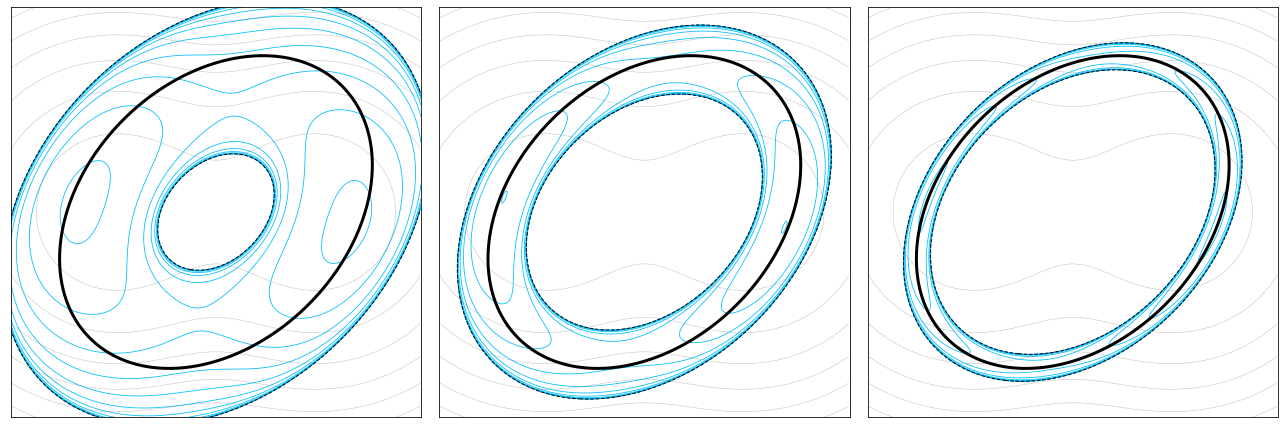

In [9]:
MANIFOLF_LW = 3.0
ASPECT = 'equal'
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

### ϵ = 1.0
ax[0].contour(*logpost_contours_epa1, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[0].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[0].contour(*manifold, levels=[z01], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[0].contour(*manifold, levels=[z01-epsilon1, z01+epsilon1], linestyles='--', colors='black', linewidths=1.0)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_aspect(ASPECT)

### ϵ = 0.5
ax[1].contour(*logpost_contours_epa2, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[1].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[1].contour(*manifold, levels=[z02], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[1].contour(*manifold, levels=[z02-epsilon2, z02+epsilon2], linestyles='--', colors='black', linewidths=1.0)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_aspect(ASPECT)

### ϵ = 0.2
ax[2].contour(*logpost_contours_epa3, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[2].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[2].contour(*manifold, levels=[z03], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[2].contour(*manifold, levels=[z03-epsilon3, z03+epsilon3], linestyles='--', colors='black', linewidths=1.0)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_aspect(ASPECT)
fig.tight_layout()
#plt.savefig("figures/contours_filamentary_epsilon_new.png", dpi=500)
plt.show()

# Same as the plot above but with uniform kernel

In [10]:
z01 = -2.9513586307684885
z02 = -2.9513586307684885
z03 = -2.9513586307684885

epsilon1 = 1.0
epsilon2 = 0.5
epsilon3 = 0.2

log_post_uni1 = lambda xi: logprior(xi) + log_uni_kernel_broadcast(xi, epsilon1, target, z01)
log_post_uni2 = lambda xi: logprior(xi) + log_uni_kernel_broadcast(xi, epsilon2, target, z02)
log_post_uni3 = lambda xi: logprior(xi) + log_uni_kernel_broadcast(xi, epsilon3, target, z03)


logpost_contours_uni1  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_uni1)
logpost_contours_uni2  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_uni2)
logpost_contours_uni3  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_uni3)

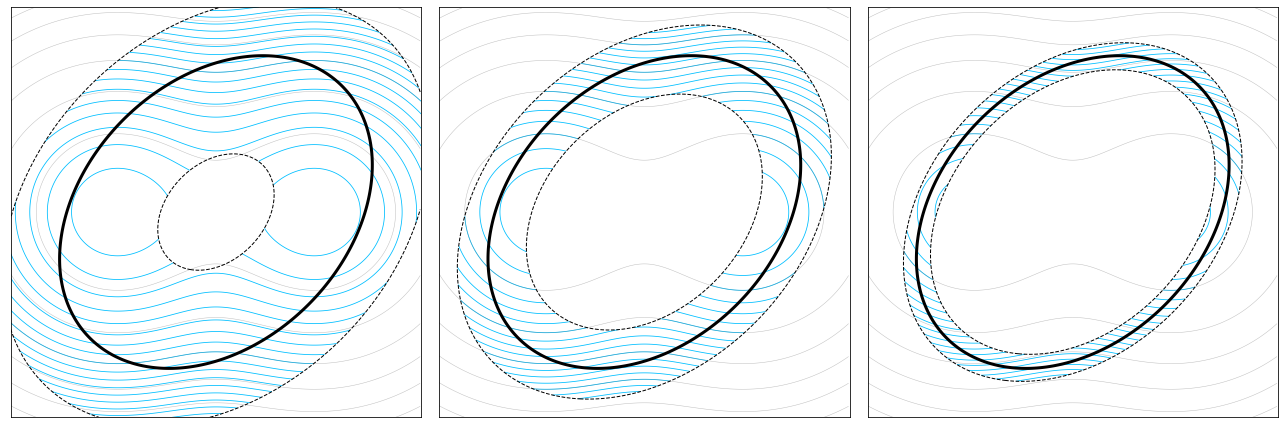

In [11]:
MANIFOLF_LW = 3.0
ASPECT = 'equal'
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

### ϵ = 1.0
ax[0].contour(*logpost_contours_uni1, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[0].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[0].contour(*manifold, levels=[z01], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[0].contour(*manifold, levels=[z01-epsilon1, z01+epsilon1], linestyles='--', colors='black', linewidths=1.0)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_aspect(ASPECT)

### ϵ = 0.5
ax[1].contour(*logpost_contours_uni2, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[1].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[1].contour(*manifold, levels=[z02], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[1].contour(*manifold, levels=[z02-epsilon2, z02+epsilon2], linestyles='--', colors='black', linewidths=1.0)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_aspect(ASPECT)

### ϵ = 0.2
ax[2].contour(*logpost_contours_uni3, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[2].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[2].contour(*manifold, levels=[z03], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[2].contour(*manifold, levels=[z03-epsilon3, z03+epsilon3], linestyles='--', colors='black', linewidths=1.0)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_aspect(ASPECT)
fig.tight_layout()
#plt.savefig("figures/contours_filamentary_epsilon_new_uniform.png", dpi=500)
plt.show()

# In the last figure, show the movement of RWM and HMC

In [12]:
point = array([1.2, -0.5])
find_point_closest_to = lambda point: fsolve(lambda x: array([f(x) - z03, 0]), point)

In [21]:
### TRY WITH UNIFORM
epsilon_sampling = 0.1
log_post_uniform_eps = lambda xi: logprior(xi) + log_uni_kernel_broadcast(xi, epsilon_sampling, target, z03)
logpost_contours_uni_eps  = prep_contour([-2, 2], [-2, 2], 0.001, log_post_uniform_eps)

In [22]:
init_point = find_point_closest_to(point)
RWM_scale = 0.035
N = 10000
sRWM, aRWM = RWM(init_point, RWM_scale, N, log_post_uniform_eps)

In [23]:
q = MVN(zeros(2), eye(2))
sHUG, aHUG = HugTangential(init_point, 5.0, 5, N, 0.0, q, log_post_uniform_eps, lambda x: -solve(Sigma_target, x))

In [24]:
print("RWM AP: {:.2%}".format(aRWM.mean()))
print("HUG AP: {:.2%}".format(aHUG.mean()))

RWM AP: 24.20%
HUG AP: 43.36%


In [66]:
# now instead try RWM but with larger step size so that the acceptance probability becomes smaller
RWM_scale2 = 0.55
N = 10000
sRWM2, aRWM2 = RWM(init_point, RWM_scale2, N, log_post_uniform_eps)

In [67]:
aRWM2.mean()*100

5.08

In [58]:
# now instead try RWM but with larger step size so that the acceptance probability becomes smaller
RWM_scale3 = 10.0
N = 10000
sRWM3, aRWM3 = RWM(init_point, RWM_scale3, N, log_post_uniform_eps)
print(aRWM3.mean()*100)

1.05


In [70]:
N_DISPLAY = 500 # 100
LEGEND_FONTSIZE = 15
rc('font',**{'family':'STIXGeneral'})

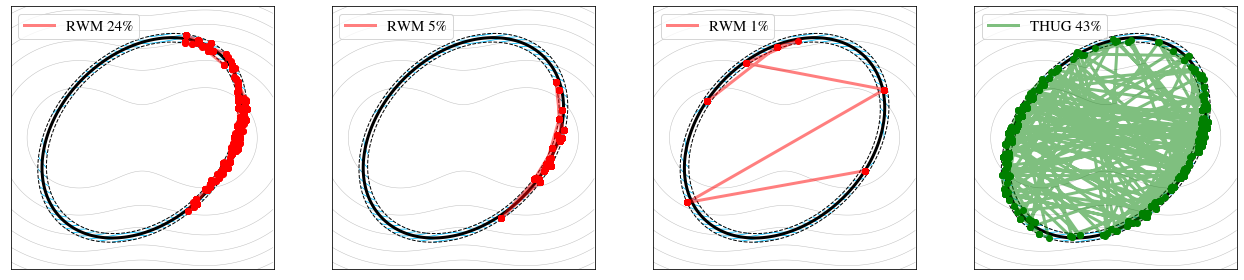

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(18, 4))
RWM_STUFF = [sRWM, sRWM2, sRWM3]
RWM_AP = [aRWM.mean()*100, aRWM2.mean()*100, aRWM3.mean()*100]
### RWM
for i in range(3):
    ax[i].contour(*logpost_contours_uni_eps, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
    ax[i].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
    ax[i].contour(*manifold, levels=[z03], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
    ax[i].contour(*manifold, levels=[z03-epsilon_sampling, z03+epsilon_sampling], linestyles='--', colors='black', linewidths=1.0)
    ax[i].set_aspect(ASPECT)
    ax[i].plot(*RWM_STUFF[i][:N_DISPLAY].T, color='red', lw=3, alpha=0.5, zorder=5, label='RWM {:.0f}%'.format(RWM_AP[i]))
    ax[i].scatter(*RWM_STUFF[i][:N_DISPLAY].T, color='red', zorder=10)
    ax[i].legend(fontsize=LEGEND_FONTSIZE, loc='upper left')
### HUG
ax[3].contour(*logpost_contours_uni_eps, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[3].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[3].contour(*manifold, levels=[z03], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[3].contour(*manifold, levels=[z03-epsilon_sampling, z03+epsilon_sampling], linestyles='--', colors='black', linewidths=1.0)
ax[3].plot(*sHUG[:N_DISPLAY].T, color='green', lw=3, alpha=0.5, zorder=5, label="THUG {:.0f}%".format(aHUG.mean()*100))
ax[3].scatter(*sHUG[:N_DISPLAY].T, color='green', zorder=10)
ax[3].legend(fontsize=LEGEND_FONTSIZE, loc='upper left')
# ax[1].set_xticks([])
# ax[1].set_yticks([])
ax[3].set_aspect(ASPECT)
for i in range(4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.savefig("figures/rwm_vs_hug_on_ellipse_density_with_varying_stepsize.png", dpi=300)
plt.show()

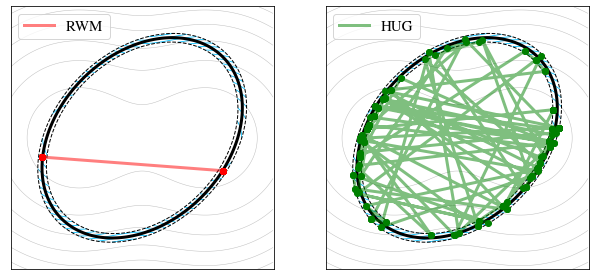

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))
### RWM
ax[0].contour(*logpost_contours_uni_eps, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[0].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[0].contour(*manifold, levels=[z03], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[0].contour(*manifold, levels=[z03-epsilon_sampling, z03+epsilon_sampling], linestyles='--', colors='black', linewidths=1.0)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_aspect(ASPECT)
ax[0].plot(*sRWM2[:N_DISPLAY].T, color='red', lw=3, alpha=0.5, zorder=5, label='RWM')
ax[0].scatter(*sRWM2[:N_DISPLAY].T, color='red', zorder=10)
ax[0].legend(fontsize=LEGEND_FONTSIZE, loc='upper left')
### HUG
ax[1].contour(*logpost_contours_uni_eps, colors='deepskyblue', linewidths=0.8, linestyles='solid', levels=20)
ax[1].contour(*logprior_contours, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
ax[1].contour(*manifold, levels=[z03], linewidths=MANIFOLF_LW, colors=['black'], linestyles='solid')
ax[1].contour(*manifold, levels=[z03-epsilon_sampling, z03+epsilon_sampling], linestyles='--', colors='black', linewidths=1.0)
ax[1].plot(*sHUG[:N_DISPLAY].T, color='green', lw=3, alpha=0.5, zorder=5, label="HUG")
ax[1].scatter(*sHUG[:N_DISPLAY].T, color='green', zorder=10)
ax[1].legend(fontsize=LEGEND_FONTSIZE, loc='upper left')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_aspect(ASPECT)
plt.tight_layout()
#plt.savefig("figures/rwm_vs_hug_on_ellipse_density.png", dpi=500)
plt.show()

# Change in Kinetic Energy as $\delta$ and $\alpha$ change

In [373]:
def apgrid(αlist, δlist, N, x0, B=5, target_dens=log_post_uniform_eps):
    nα, nδ = len(αlist), len(δlist)
    ap = zeros((nα, nδ))
    for i, α in enumerate(αlist):
        for j, δ in enumerate(δlist):
            _, a = HugTangential(x0, δ*B, B, N, α, q, target_dens, lambda x: -solve(Sigma_target, x))
            ap[i, j] = a.mean()
    return ap

In [387]:
αlist = [0.0, 0.25, 0.5, 0.75, 0.99]
δlist = [0.01, 0.1, 1.0, 10.]
generate_dens = lambda ϵ: lambda xi: logprior(xi) + log_uni_kernel_broadcast(xi, ϵ, target, z03)

In [388]:
# Compute grid for multiple values of epsilon
ϵlist = [0.1, 0.01, 0.001, 0.0001, 0.00001]
aps = []
for ϵ in ϵlist: 
    aps.append(apgrid(αlist, δlist, 10000, init_point, target_dens=generate_dens(ϵ)))

In [ ]:
def HugTangentialTrue(x0, T, B, N, q, logpi, grad_log_pi):
    """True Hug Tangential."""
    samples, acceptances = x0, np.zeros(N)
    for i in range(N):
        v0s = q.rvs()                    # Draw velocity spherically
        g = grad_log_pi(x0)              # Compute gradient at x0
        g = g / norm(g)                  # Normalize
        v0 = v0s - * g * (g @ v0s)       # Project onto \Tcal_0
        v, x = v0, x0                    # Housekeeping
        logu = np.log(rand())            # Acceptance ratio
        delta = T / B                    # Compute step size

        for _ in range(B):
            x = x + delta*v/2           # Move to midpoint
            g = grad_log_pi(x)          # Compute gradient at midpoint
            ghat = g / norm(g)          # Normalize 
            v = v - 2*(v @ ghat) * ghat # Reflect velocity using midpoint gradient
            x = x + delta*v/2           # Move from midpoint to end-point
        # Project final displacement
        g = grad_log_pi(x)
        g = g / norm(g)
        v = v + (alpha / (1 - alpha)) * g * (g @ v)
        # In the acceptance ratio must use spherical velocities!! Hence v0s and the unsqueezed v
        if logu <= logpi(x) + q.logpdf(v) - logpi(x0) - q.logpdf(v0s):
            samples = np.vstack((samples, x))
            acceptances[i] = 1         # Accepted!
            x0 = x
        else:
            samples = np.vstack((samples, x0))
            acceptances[i] = 0         # Rejected
    return samples[1:], acceptances

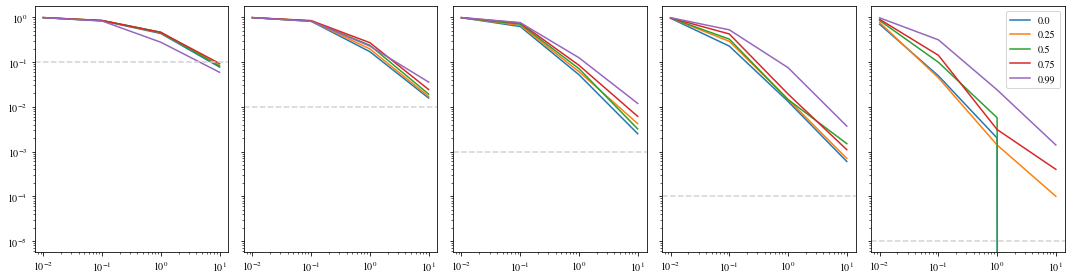

In [389]:
fig, ax = plt.subplots(ncols=len(ϵlist), figsize=(15, 4), sharey=True, sharex=True)
for i in range(len(ϵlist)):
    ax[i].plot(δlist, aps[i].T, label=αlist)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].axhline(ϵlist[i], linestyle='--', color='lightgray')
plt.legend()
plt.tight_layout()
plt.show()